**Andrew Welling**

Spring 2025

CS 251/2: Data Analysis and Visualization

Project 2: Linear regression

#### Week 2: Polynomial regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import data
import linear_regression

plt.style.use(['seaborn-v0_8-colorblind', 'seaborn-v0_8-darkgrid'])
plt.rcParams.update({'font.size': 20})

np.set_printoptions(suppress=True, precision=5)

# Automatically reload external modules
%load_ext autoreload
%autoreload 2

## CS252 Note

For full credit, please use your Normal Equations least squares solver throughout this notebook.

## Task 3: Polynomial Regression

We have been creating linear regression fits of form $y =c_0 + c_1x_1 + c_2x_2 + \ldots$, where $x_i$ are independent variables (columns of $A$) and $c_i$ are corresponding coefficients in $c$. However, this equation only allows us to fit data with a line/plane. This may not be the best choice for all datasets.

In this task, you will generalize the linear regression model form to include higher-degree (>1) polynomial terms and explore how this may improve fits to complex data. For example, assume we're doing a simple linear regression with independent variable $x_1$ and dependent variable $y$. A linear regression that fits data with a quadratic shape has the form$$y = c_0 + c_1x_1 + c_2x_1^2$$

Complete the following steps to add support for polynomial regression in your `LinearRegression` class.

### 3a. Build the polynomial matrix of the independent variable

The polynomial matrix contains the independent variable raised to a different power in each column. For example, if $A$ originally has a column vector for the independent variable $\vec{x_1}$ ($A = [\vec{x_1}]$) and we wanted to make the above quadratic model, we would append $x_1^2$ ($A = [\vec{x_1}, \vec{x_1^2}]$).

**TODO:**
Implement and test `LinearRegression::make_polynomial_matrix` (*helper method*) that takes care of raising the independent variable samples to different powers.

##### Test `make_polynomial_matrix`

In [2]:
test_A = np.r_[1:10].reshape((9, 1))
test_p = 3

# Test cubic
lin_reg = linear_regression.LinearRegression(data.Data())
print(f'Your polynomial matrix:\n{lin_reg.make_polynomial_matrix(test_A, 3)}')

true_mat = '''
[[  1.   1.   1.]
 [  2.   4.   8.]
 [  3.   9.  27.]
 [  4.  16.  64.]
 [  5.  25. 125.]
 [  6.  36. 216.]
 [  7.  49. 343.]
 [  8.  64. 512.]
 [  9.  81. 729.]]
'''
print('It should look like:\n', true_mat)

Your polynomial matrix:
[[  1.   1.   1.]
 [  2.   4.   8.]
 [  3.   9.  27.]
 [  4.  16.  64.]
 [  5.  25. 125.]
 [  6.  36. 216.]
 [  7.  49. 343.]
 [  8.  64. 512.]
 [  9.  81. 729.]]
It should look like:
 
[[  1.   1.   1.]
 [  2.   4.   8.]
 [  3.   9.  27.]
 [  4.  16.  64.]
 [  5.  25. 125.]
 [  6.  36. 216.]
 [  7.  49. 343.]
 [  8.  64. 512.]
 [  9.  81. 729.]]



### 3b. Add support for polynomial regression

This can be performed in 3 steps:


1. Implement the `LinearRegression::polynomial_regression` method to perform the polynomial regression (*alternate option: you may instead update your `linear_regression` method. If you decide to go this route, add a keyword argument for the polynomial degree with a default value of 1 to preserve compatability with regular linear regression.*).
2. Update `LinearRegression::predict`: Run `make_polynomial_matrix` on the "A" matrix that enters into the computation $y = Ac$ if `self.p > 1`.
3. Add support for plotting polynomials in `LinearRegression::scatter` by generalizing the plotted regression line to a regression polynomial if `self.p > 1`:
    - Getting your polynomial "x" values: Run `make_polynomial_matrix` on your evenly-spaced line sample points. To get the shapes to work out, you may need to add a trailing singleton dimension to your "x" sample points. For example, if you have 1000 "x" sample points, make the shape `(1000, 1)` rather than `(1000,)`.
    - Getting your polynomial "y" values: Use matrix multiplication with your polynomial regression model slopes and/or intercepts.

*There is no explicit test code here — visualizing the fit in the next subtask will help you debug!*

### 3c. Test polynomial regression with linear and cubic models

This subtask will help to make sure your polynomial regression implementation is working.

1. In the cell below, fit the `wave_fit.csv` dataset using polynomial regression where the polynomial degree $p = 1$ and separately with $p = 3$.
2. Use `scatter` to plot the results.
3. Print out the mean squared error.

The plot for the $p=1$ regression should "look right" to you and the $p=3$ fit should look visually similar.

In [3]:
poly_data_filename = 'data/wave_fit.csv'
poly_data = data.Data(poly_data_filename)
print(poly_data)

data/wave_fit.csv (150x2)
Headers:
x  y
----------------------------------------
Showing first 5/150 rows
2.0858  -0.4942
4.6724  -5.85
2.4812  -3.3264
0.2579  4.5996
-0.9518  4.9771



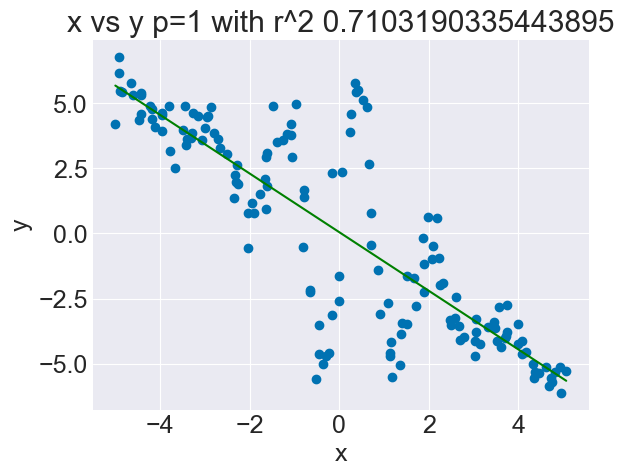

In [4]:
lin_reg.set_data(poly_data)
lin_reg.poly_regression("x","y",method="scipy",p=1)
lin_reg.scatter("x","y",f"x vs y p=1 with r^2 {lin_reg.R2}")

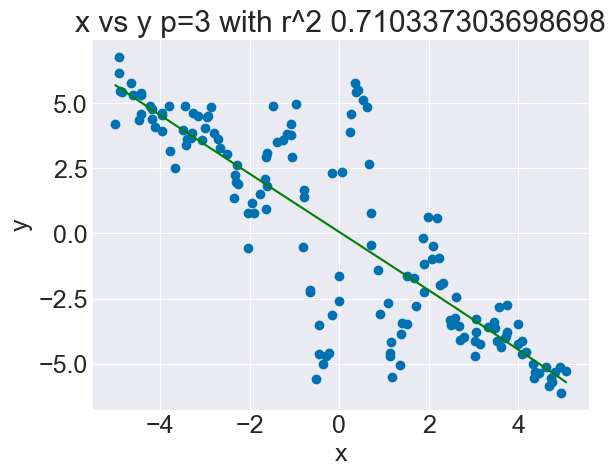

In [5]:
lin_reg.poly_regression("x","y",method="normal",p=3)
lin_reg.scatter("x","y",f"x vs y p=3 with r^2 {lin_reg.R2}")

### 3d.Polynomial regression with higher degree polynomials

Repeat the steps from the previous subtask, but this time find the smallest polynomial degree that gives you a $R^2 > 0.76$.

Make a plot showing the fitted data with the polynomial that you find.

*Your regression fit should not be a line!*

### Some code to find this value for us and a scatter with all the p lines

16


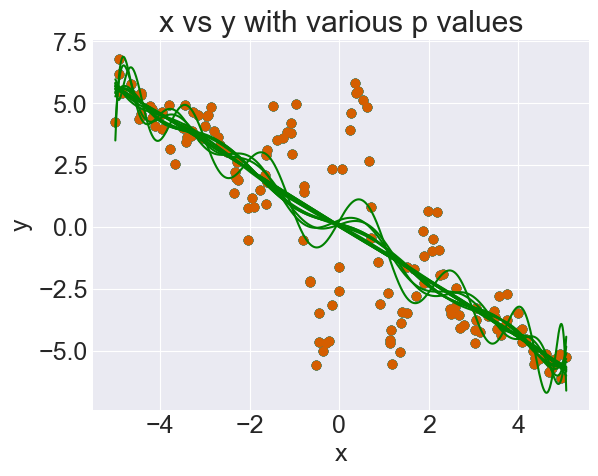

In [6]:
p = 1
lin_reg.poly_regression("x","y",method="normal",p=p)
while lin_reg.R2 <= .76:
    lin_reg.poly_regression("x","y",method="normal",p=p)
    p+= 1
    lin_reg.scatter("x","y","x vs y with various p values")
print(p) # should be 16

### The chart solely at said p value

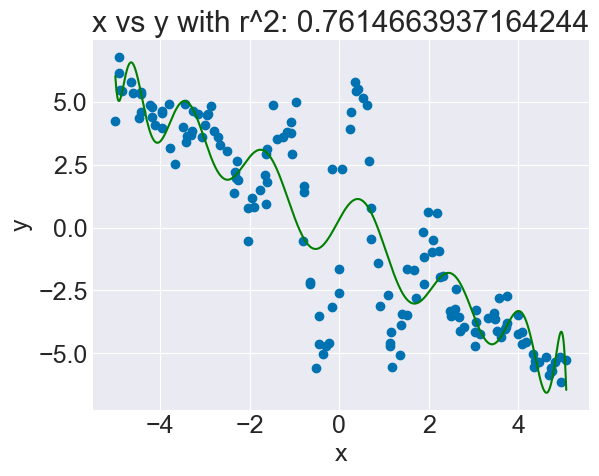

In [7]:
lin_reg.poly_regression("x","y",method="normal",p=p)
lin_reg.scatter("x","y",f"{lin_reg.ind_vars[0]} vs {lin_reg.dep_var} with r^2: {lin_reg.R2}")

### 3e. Questions

**Question 4:** Is the fit better or worse compared to what you found in Task 3c? Why?

**Answer 4:**

The fit at p=16 is better. This is reflected both visually (the line is closer to and hits more points) and this is also reflected in the higher R^2^ value.

**Question 5:** Describe what happens visually to the shape of the regression curve and in relation to the data as you experiment with the polynomial degree between 1 and the polynomial degree that you found.

**Answer 5:**

The regression curve gets more curvy as the polynomial degree increases, this is visually reflected in the first scatter graph, as it shows all the lines with increasing polynomial degrees leading up to the final p=16 one.

### 3f. Fit error analysis

Create a plot showing the MSE values as the polynomial degree goes from 1 to the polynomial degree that you found above.

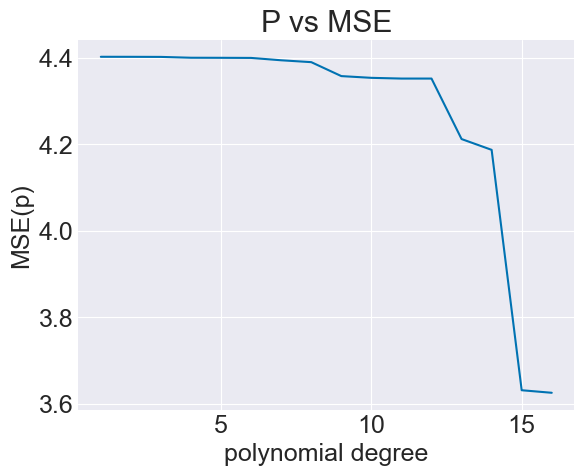

In [8]:
mse_list = []
p_list = []
for i in range(1,p+1):
    p_list.append(i)
    lin_reg.poly_regression("x","y",method="normal",p=i)
    mse_list.append(lin_reg.mse)
plt.plot(p_list,mse_list,"")
plt.xlabel("polynomial degree")
plt.ylabel("MSE(p)")
plt.title("P vs MSE")
plt.show()

### 3g. Questions

**Question 6:** According to the MSE, is the fit generally improving or worsening as $p$ increases?


**Answer 6:**

According to MSE, the fit does generally improve as p increases. This is reflected by the nose dive that the error takes as p nears the 13 and 14th degrees, leading to the lowest we have which is at around 3.6 when p=16. Though, for p values before this dive takes shape, the difference in MSE is largely negligible.

## Task 4: Overfitting

In this subtask, you will experiment with how polynomial regression generalize to data not used to fit the regression model.

### 4a. Create fit and validation sets

The `wave.csv` dataset has 300 samples ($N=300$). In the cell below, split these samples into two separate "datasets" and create 2 `Data` objects representing:
- The first 50% of samples will be used to fit the regression model (i.e. run linear regression on these samples). We will call this the **fit set** (data used to fit the regression).
- The second 50% of samples will be set aside and only used to check how well the fitted regression generalizes to new data. We will call this the **validation set**.

The data samples are already shuffled.

*Hint: There is a helpful `Data` method for paring down a dataset into a certain range of samples.*

In [9]:
data_fit = data.Data('data/wave.csv')
data_fit.limit_samples(0, 150)
data_val = data.Data('data/wave.csv')
data_val.limit_samples(150, 300)

#### Test: Fit and validation sets

In [10]:
# NOTE: The Data object containing the fit dataset in the test below is called `data_fit`
# The The Data object containing the validation dataset in the test below is called `data_val`
print(f'The first sample of the fit data is\n{data_fit.get_sample(0)} and it should be')
print('[-4.5635  5.0392]')
print(f'The last sample of the fit data is\n{data_fit.get_sample(149)} and it should be')
print('[ 1.2476 -3.9375]')
print(f'The first sample of the val data is\n{data_val.get_sample(0)} and it should be')
print('[-0.7677 -2.8413]')
print(f'The last sample of the val data is\n{data_val.get_sample(149)} and it should be')
print('[ 4.1889 -3.9513]')

The first sample of the fit data is
[-4.5635  5.0392] and it should be
[-4.5635  5.0392]
The last sample of the fit data is
[ 1.2476 -3.9375] and it should be
[ 1.2476 -3.9375]
The first sample of the val data is
[-0.7677 -2.8413] and it should be
[-0.7677 -2.8413]
The last sample of the val data is
[ 4.1889 -3.9513] and it should be
[ 4.1889 -3.9513]


### 4b. Copying fitted regression coefficients

Because we fit the polynomial regression on the fit set, the fitted coefficients are stored in the fit set, `LinearRegression` object. To visualize the predictions on the validation set, we will need to first copy over the coefficients from the fit set `LinearRegression` object to the validation set `LinearRegression` object.

Implement the following methods to accomplish this:
- `get_fitted_slope`: return the fitted regression slopes.
- `get_fitted_intercept`: return the fitted regression intercept.
- `initialize(ind_vars, dep_var, slope, intercept, p)`: set fields based on passed in parameter values.

### 4c. Check fit generalization on validation set

In the cell below, fit a degree 20 polynomial regression model to the fit set and assess generalization on the validation set.

Checklist for what to include:
1. Fit a polynomial regression model with polynomial degree 20 on the fit set.
2. Create 2 scatter plots:
    - Showing the fit set and regression curve fitted to it.
    - Showing the validation set and regression curve that uses the fitted coefficients to the **fit set**.
3. Compute and print the MSE for both the fit and validation sets.

MSE on fit: 2.214132585379082


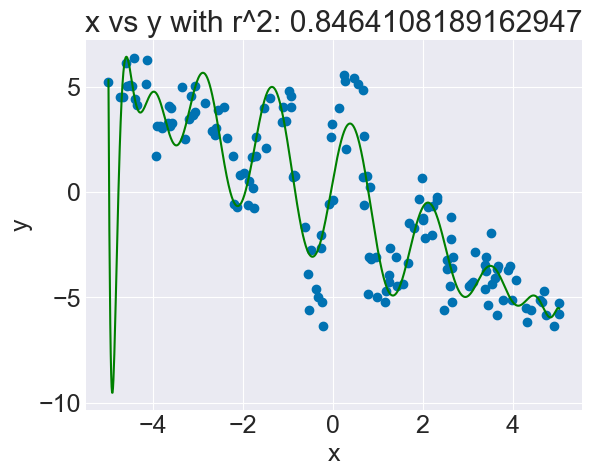

In [11]:
lin_reg.set_data(data_fit)
lin_reg.poly_regression("x","y",method="scipy",p=20)
lin_reg.scatter("x","y", f"x vs y with r^2: {lin_reg.R2}")
print(f"MSE on fit: {lin_reg.mse}")

MSE on val: 5.619330014447979


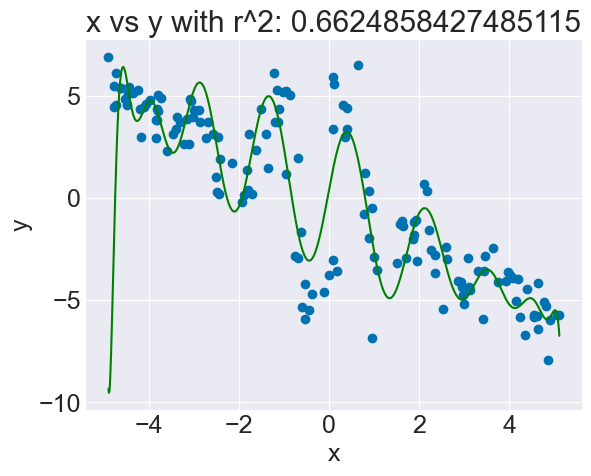

In [12]:
lin_reg.set_data(data_val) # set data to validation data
lin_reg.y = data_val.select_data("y") # reset y data
y_pred = lin_reg.predict(data_val.select_data("x")) # predict on our x data
lin_reg.residuals = lin_reg.compute_residuals(y_pred) # create new residuals
lin_reg.mse = lin_reg.compute_mse() # new mse
print(f"MSE on val: {lin_reg.mse}")
lin_reg.R2 = lin_reg.r_squared(y_pred) # compute new R2
lin_reg.scatter("x","y", f"x vs y with r^2: {lin_reg.R2}")

### 4d. Questions

**Question 7:** How do the fitted coefficients obtained for the fit set generalize to the validation set. Why?

**Answer 7:**

The fitted coefficients fit the validation data pretty well, though the MSE is higher for the validation set. A higher error makes sense, as this is not the data that this model was trained on. Visually, it appears that the data is also more spread out in the validation set, which means the higher error is reasonable when using the fitted coefficients.

### 4e. Acceptable generalization

Find a polynomial degree that you believe yields acceptable generalization to the validation set. Make a plot and report several metrics that justify your finding.

**Note:** Base your decision making upon the metrics, even though you might think the visual appearance is not "ideal".

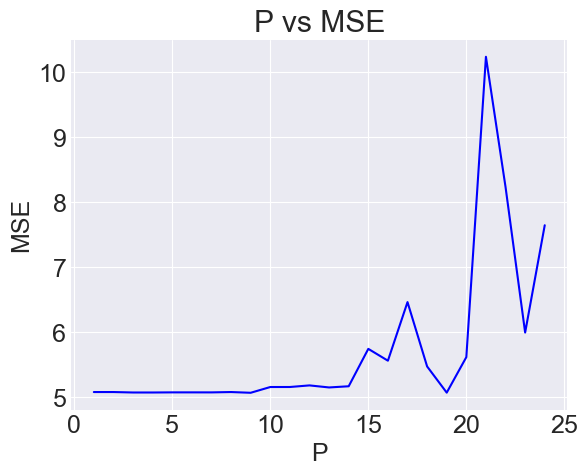

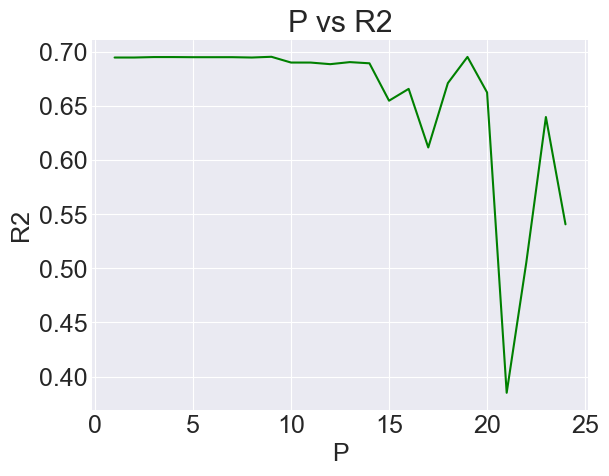

Highest R2 is at p=9
lowest MSE is at p=9


In [13]:
mse_list = []
R2_list = []
p_list = []
for p in range(1,25): # using polynomial degrees 1-25
    # create new regression using new p value on data_fit
    lin_reg.set_data(data_fit)
    lin_reg.poly_regression("x","y",method="scipy",p=p)

    # calculate metrics using validation data and that prediction
    lin_reg.set_data(data_val) # set data to validation data
    lin_reg.y = data_val.select_data("y") # reset y data
    y_pred = lin_reg.predict(data_val.select_data("x")) # predict on our x data
    lin_reg.residuals = lin_reg.compute_residuals(y_pred) # create new residuals
    lin_reg.mse = lin_reg.compute_mse() # new mse
    lin_reg.R2 = lin_reg.r_squared(y_pred) # compute new R2
    # append info
    p_list.append(p)
    mse_list.append(lin_reg.mse)
    R2_list.append(lin_reg.R2)

# display polynomial vs metric
plt.plot(p_list,mse_list, color="blue")
plt.xlabel("P")
plt.ylabel("MSE")
plt.title("P vs MSE")
plt.show()
plt.plot(p_list,R2_list, color="green")
plt.ylabel("R2")
plt.xlabel("P")
plt.title("P vs R2")
plt.show()
# print our results
print(f"Highest R2 is at p={R2_list.index(max(R2_list))+1}")
print(f"lowest MSE is at p={mse_list.index(min(mse_list))+1}")

As shown above, the best model is at a p=9 polynomial regression. This value has the highest R^2 and the lowest MSE, meaning it performs significantly better than the mean of the data would and the residuals of the predicted model are at the lowest when compared against the data. Data is also plotted above, a slight downtick can be displayed at this value in the p vs MSE and a slight uptick is shown in th p vs R2 graph.